In [14]:
%load_ext autoreload
%autoreload 2

import sys
from functools import partial
import importlib

import jax
import jax.numpy as jnp

sys.path.append('../../../')

import forward_model
importlib.reload(forward_model)
from forward_model.ics import get_delta
from forward_model.lpt import get_forward_lpt
from forward_model.plot_utils import plot_cubes, compare_deltas, compare_pow_spec

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
N, L, Z_I, Z_F = 128, 400, 99, 0

INPUT_ARG = "U"
R_S = 1

SEED_INT = 1
key = jax.random.PRNGKey(SEED_INT)
input_arr = jax.random.normal(key, shape=(N**3,))

In [27]:
get_forward_lpt_ = partial(
    get_forward_lpt,
    N,
    L,
    Z_I,
    Z_F,
    INPUT_ARG=INPUT_ARG,
    R_S=R_S
)

lpt_methods = ['LPT1', 'LPT2', 'SC', 'SC', 'SC', 'SC', 'ALPT', 'ALPT']
muscles = [None, None, False, False, True, True, False, True]
muscle_iters = [None, None, None,  None, 'ONE', 'ONE', None, 'ONE']
sc_corrs = [None, None, False, True, False, True, True, True]


deltas = []
for i, lpt_method in enumerate(lpt_methods):
    forward_lpt = get_forward_lpt_(LPT_METHOD=lpt_method, 
                                   MUSCLE=muscles[i],
                                   SC_CORRECTION=sc_corrs[i]
                                       )
    deltas.append(forward_lpt(input_arr))

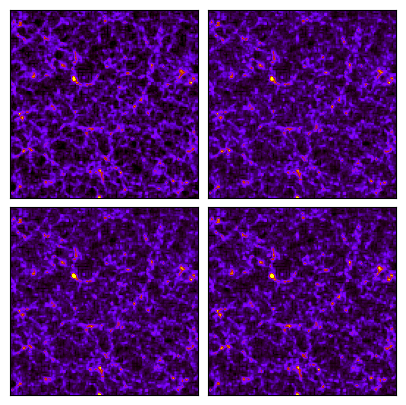

In [28]:
fig, ax = plot_cubes([deltas[0], deltas[3], deltas[5], deltas[-1]], cmap='gnuplot', vlim=(-1, 10), idx=N//2, width=1, axis=2, )

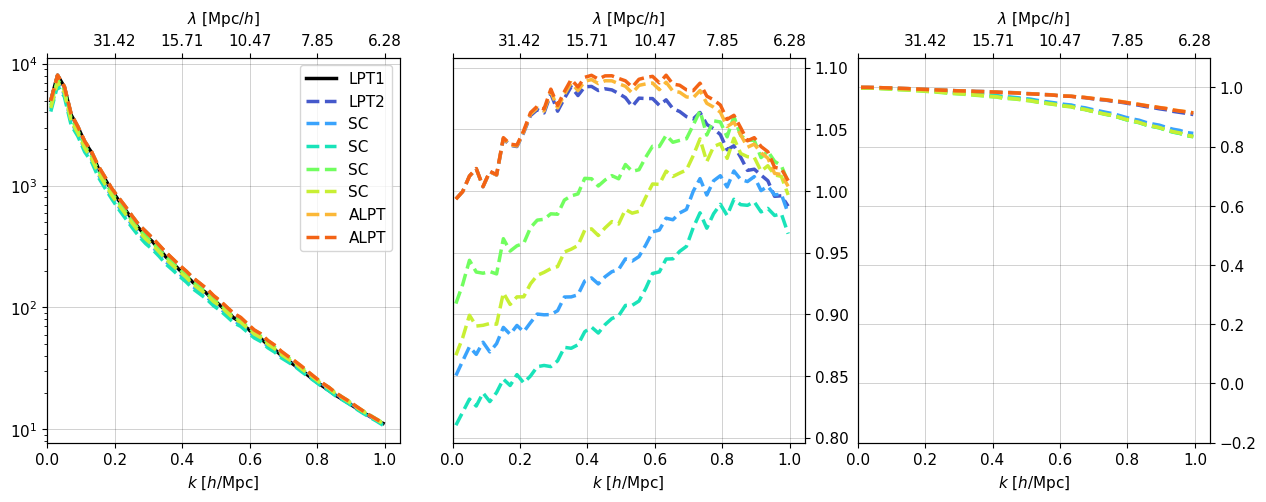

In [29]:
fig, axs = compare_pow_spec(deltas, L, n_bins=50, labels=lpt_methods, sphere_only=True)
#axs[0].set_ylim(1e0, 1e4)

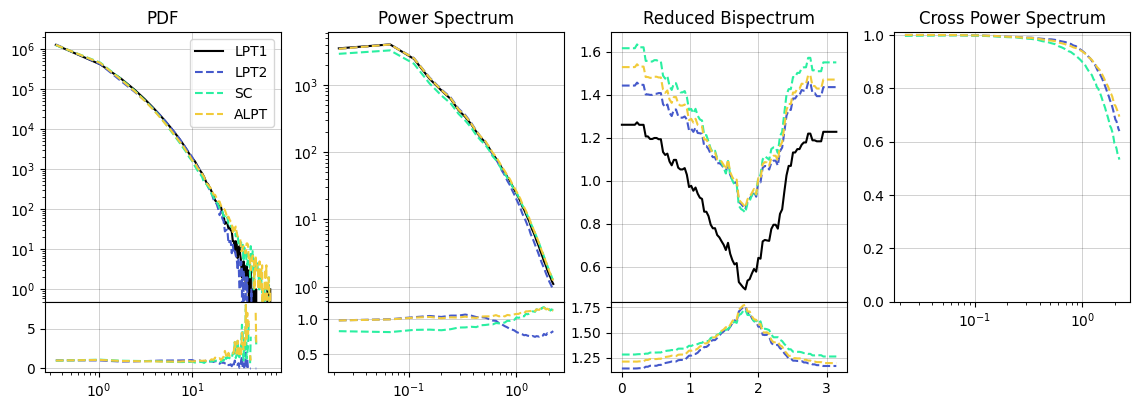

In [9]:
n_pdf_bins = 100
n_pk_bins = 50
n_thetas = 100
fig = compare_deltas(deltas[0], deltas[1:], L, n_pdf_bins=n_pdf_bins, n_pk_bins=n_pk_bins, n_thetas=n_thetas, ref_label=lpt_methods[0], labels=lpt_methods[1:])